# Lecture 19 - Lab: PLS
## CMSE 381 - Fall 2022
## Oct 28, 2022



In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

import seaborn as sns

# ML imports we've used previously
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA


# PLS on Hitters Data

# Loading in the data

Ok, here we go, let's play with a baseball data set again. Note this cleanup is all the same as the last lab. 

In [2]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis = 1)
df.info()
dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [3]:
y = df.Salary

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')

# Define the feature set X.
X = pd.concat([X_, dummies[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    float64
 1   Hits         263 non-null    float64
 2   HmRun        263 non-null    float64
 3   Runs         263 non-null    float64
 4   RBI          263 non-null    float64
 5   Walks        263 non-null    float64
 6   Years        263 non-null    float64
 7   CAtBat       263 non-null    float64
 8   CHits        263 non-null    float64
 9   CHmRun       263 non-null    float64
 10  CRuns        263 non-null    float64
 11  CRBI         263 non-null    float64
 12  CWalks       263 non-null    float64
 13  PutOuts      263 non-null    float64
 14  Assists      263 non-null    float64
 15  Errors       263 non-null    float64
 16  League_N     263 non-null    uint8  
 17  Division_W   263 non-null    uint8  
 18  NewLeague_N  263 non-null    uint8  
dtypes: float

In [4]:
# And here we have the normalized data.
X_normalized = X/X.std()
X_normalized.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
1,2.138388,1.795001,0.799351,0.939709,1.468161,1.795741,2.920551,1.508364,1.288183,0.839441,0.969207,1.280276,1.420154,2.257670,0.296387,1.513644,1.999449,1.996555,2.001424
2,3.251708,2.880866,2.055473,2.584200,2.781779,3.499392,0.625832,0.710230,0.705030,0.766446,0.676331,0.822593,0.996001,3.143592,0.565203,2.119101,0.000000,1.996555,0.000000
3,3.367113,3.124631,2.283859,2.545046,3.013594,1.703652,2.294719,2.461315,2.429807,2.737307,2.500011,2.591477,1.340625,0.714453,0.075820,0.454093,1.999449,0.000000,2.001424
4,2.179119,1.927964,1.141930,1.527027,1.622705,1.381339,0.417222,0.173184,0.155816,0.145990,0.144928,0.142253,0.124974,2.875672,0.275709,0.605458,1.999449,0.000000,2.001424
5,4.032389,3.745125,0.456772,2.897437,1.970427,1.611562,2.294719,1.927767,1.747918,0.231150,1.512688,1.039065,0.734693,1.007378,2.901836,3.784109,0.000000,1.996555,0.000000


# Principal Least Squares (PLS)

The command do do PLS in `Scikit-learn` is  `PLSRegression`. Below is a quick code that runs PLS on our dataset. 

In [5]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold

In [6]:
pls = PLSRegression(n_components=3)
pls.fit(X_normalized,y)
yhat = pls.predict(X_normalized)
mean_squared_error(y,yhat)

105986.31016965951

But like last time, we can also use the `cross_val_score` function to get the CV score easily. 

In [7]:
pls = PLSRegression(n_components=3)
scores = cross_val_score(pls, X_normalized, y, cv=10, scoring='neg_mean_squared_error')
scores.mean()

-120342.57274839826

&#9989; **<font color=red>Do this:</font>**  Like last time, your job is to test a PLS model for an increasing number of components used. I recommend using the `cross_val_score` with `scoring='neg_mean_squared_error'`. What number of components would you use? 

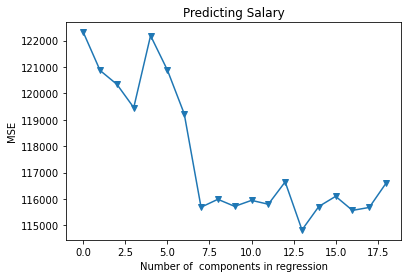

In [11]:
n = len(X_normalized)
mse = []

# Calculate MSE using CV for an increasing number of components, 
# adding one component at a time.
for i in np.arange(1, 20): # i is the number of components to use each time
    # ====
    pls = PLSRegression(n_components = i)
    score = cross_val_score(pls, X_normalized, y, cv = 10, scoring='neg_mean_squared_error') # Your code to figure out the score each time goes in here. 
    # ====

    mse.append(np.mean(-score))
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of  components in regression')
plt.ylabel('MSE')
plt.title('Predicting Salary')
plt.xlim(xmin=-1);

&#9989; **<font color=red>Do this:</font>**  Below is my code from doing the PCR version on this data set from last class. Draw the two plots overlaid: The test MSE from doing PLS and that form doing PCR.  What do you notice? Which model would you pick with which number of components and why?

In [12]:
pca = PCA()
X_PCs = pca.fit_transform(X_normalized)

# 10-fold CV, with shuffle included. 
# You can just put in `cv=10` below, but this doesn't shuffle the data
n = len(X_normalized)
kf_10 = KFold( n_splits=10, shuffle=True, random_state=48864)

regr = LinearRegression()
msePCA = []

# Calculate MSE using CV for the 19 principal components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*cross_val_score(regr, X_PCs[:,:i], y.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    msePCA.append(score)


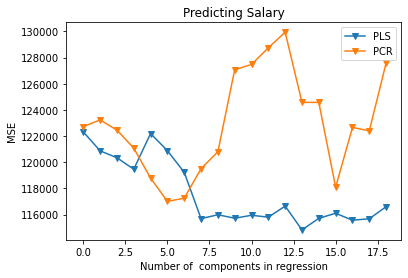

In [17]:
# Your plot code here
plt.plot(mse, '-v', label = 'PLS')
plt.plot(msePCA, '-v', label = 'PCR')
plt.xlabel('Number of  components in regression')
plt.ylabel('MSE')
plt.title('Predicting Salary')
plt.legend()
plt.xlim(xmin=-1);

In [18]:
mse.index(min(mse))

13



-----
### Congratulations, we're done!
Written by Dr. Liz Munch, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.